In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import plotly.express as px
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn import ensemble
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


In [2]:
df = pd.read_csv(r"C:\Users\HP Notebook\Desktop\airbnb data\Airbnb_data.csv")

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
df.dropna(inplace=True)


In [7]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [9]:
df = df[(df['price'] > 0) & (df['price'] <= 500) & (df['minimum_nights'] < 30)]

In [10]:
df_model=df[['neighbourhood_group','room_type','price','availability_365','minimum_nights']]
df_model['availability_365']=df_model['availability_365']/365

C:\Users\HP Notebook\AppData\Local\Temp\ipykernel_6908\2029532727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['availability_365']=df_model['availability_365']/365


In [11]:
required_cols=list(df_model.columns)

In [12]:
df_model_input=df_model[required_cols]

In [13]:
df_model_input=pd.concat([pd.get_dummies(df_model_input[['neighbourhood_group','room_type']]),df_model_input[['availability_365','minimum_nights']]],axis=1)
scaler = MinMaxScaler()

df_model[['price']] = scaler.fit_transform(df_model[['price']])

C:\Users\HP Notebook\AppData\Local\Temp\ipykernel_6908\3324171919.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model[['price']] = scaler.fit_transform(df_model[['price']])


In [14]:

X=np.array(df_model_input)
X
Y=np.array(df_model['price']).reshape(-1,1)
Y

array([[0.28367347],
       [0.43877551],
       [0.16122449],
       ...,
       [0.45918367],
       [0.18367347],
       [0.04081633]])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
model=LinearRegression()
# Fit the model 
model.fit(X_train, y_train) 
y_pred = model.predict(X_test) 
print(mean_absolute_error(y_test, y_pred)) 
#res = model.fit()
#print(res.summary())


0.0915380483628964


In [17]:
r2_score(y_test, y_pred)

0.41315494157690413

In [18]:
df_model_input

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,availability_365,minimum_nights
0,False,True,False,False,False,False,True,False,1.000000,1
1,False,False,True,False,False,True,False,False,0.972603,1
3,False,True,False,False,False,True,False,False,0.531507,1
4,False,False,True,False,False,True,False,False,0.000000,10
5,False,False,True,False,False,True,False,False,0.353425,3
...,...,...,...,...,...,...,...,...,...,...
48782,False,False,True,False,False,False,True,False,0.402740,1
48790,False,False,False,True,False,False,True,False,0.928767,1
48799,False,False,False,False,True,False,True,False,0.238356,1
48805,True,False,False,False,False,True,False,False,0.109589,1


In [19]:
dfa=pd.concat([df_model_input,df_model['price']],axis=1)

In [20]:
'+'.join(tuple(dfa.columns))

'neighbourhood_group_Bronx+neighbourhood_group_Brooklyn+neighbourhood_group_Manhattan+neighbourhood_group_Queens+neighbourhood_group_Staten Island+room_type_Entire home/apt+room_type_Private room+room_type_Shared room+availability_365+minimum_nights+price'

In [21]:
cols=dfa.columns

In [22]:
cols=[x.replace(" ", "_") for x in cols]
cols=[x.replace("/", "_") for x in cols]

In [24]:
dfa.columns=cols

In [25]:
cols

['neighbourhood_group_Bronx',
 'neighbourhood_group_Brooklyn',
 'neighbourhood_group_Manhattan',
 'neighbourhood_group_Queens',
 'neighbourhood_group_Staten_Island',
 'room_type_Entire_home_apt',
 'room_type_Private_room',
 'room_type_Shared_room',
 'availability_365',
 'minimum_nights',
 'price']

In [27]:
model = sm.OLS.from_formula("price ~ neighbourhood_group_Bronx+neighbourhood_group_Brooklyn+neighbourhood_group_Manhattan+neighbourhood_group_Queens+neighbourhood_group_Staten_Island+room_type_Entire_home_apt+room_type_Private_room+room_type_Shared_room+availability_365+minimum_nights", data=dfa)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     3050.
Date:                Sat, 20 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:12:14   Log-Likelihood:                 21317.
No. Observations:               35500   AIC:                        -4.262e+04
Df Residuals:                   35491   BIC:                        -4.254e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

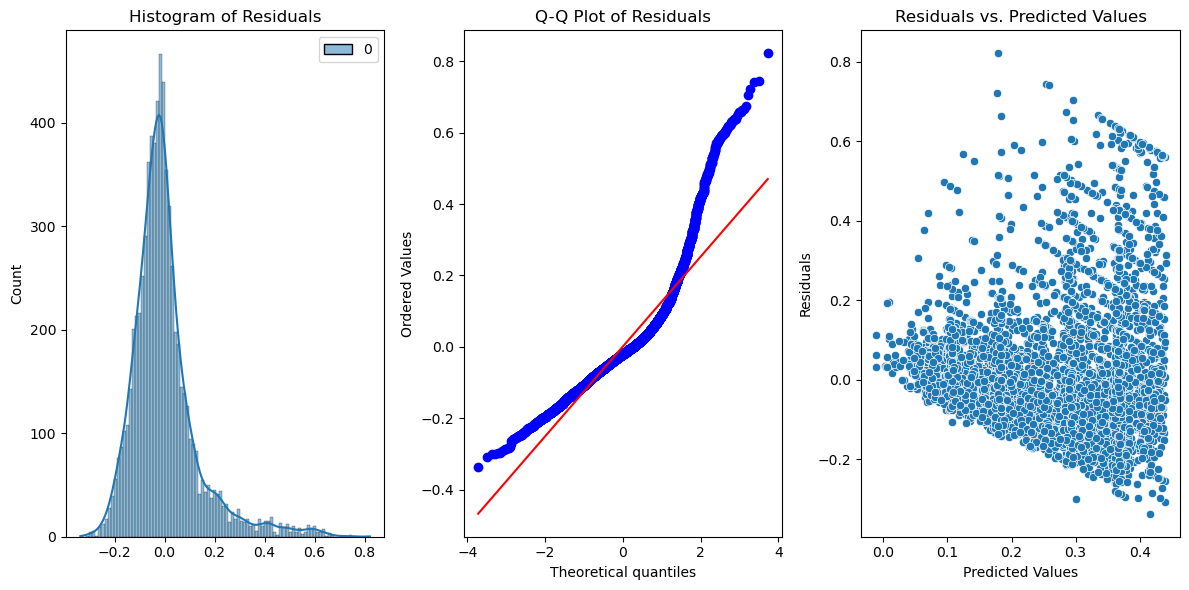

In [28]:
# Import necessary libraries
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split

# Step 1: Evaluate Model Assumptions and Diagnostics
# Residual analysis for normality
residuals = y_test - y_pred

# Histogram of residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')

# Q-Q plot
plt.subplot(1, 3, 2)
stats.probplot(residuals.flatten(), dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

# Residuals vs. Predicted Values for Homoscedasticity
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_pred.flatten(), y=residuals.flatten())
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


In [29]:
# Coefficients and intercept from your model
intercept = 0.0983
coef_neighbourhood_group_Bronx = -0.0190
coef_neighbourhood_group_Brooklyn = 0.0346
coef_neighbourhood_group_Manhattan = 0.1068
coef_neighbourhood_group_Queens = 0.0043
coef_neighbourhood_group_Staten_Island = -0.0285
coef_room_type_Entire_home_apt = 0.1717
coef_room_type_Private_room = -0.0089
coef_room_type_Shared_room = -0.0645
coef_availability_365 = 0.0578
coef_minimum_nights = -0.0006

# Input variables for prediction
neighbourhood_group_Bronx = 0  # Replace with 1 if true, 0 otherwise
neighbourhood_group_Brooklyn = 0  # Replace with 1 if true, 0 otherwise
neighbourhood_group_Manhattan = 1  # Replace with 1 if true, 0 otherwise
neighbourhood_group_Queens = 0  # Replace with 1 if true, 0 otherwise
neighbourhood_group_Staten_Island = 0  # Replace with 1 if true, 0 otherwise
room_type_Entire_home_apt = 1  # Replace with 1 if true, 0 otherwise
room_type_Private_room = 0  # Replace with 1 if true, 0 otherwise
room_type_Shared_room = 0  # Replace with 1 if true, 0 otherwise
availability_365 = 200
minimum_nights = 5

# Calculate predicted price
predicted_price = (
    intercept +
    coef_neighbourhood_group_Bronx * neighbourhood_group_Bronx +
    coef_neighbourhood_group_Brooklyn * neighbourhood_group_Brooklyn +
    coef_neighbourhood_group_Manhattan * neighbourhood_group_Manhattan +
    coef_neighbourhood_group_Queens * neighbourhood_group_Queens +
    coef_neighbourhood_group_Staten_Island * neighbourhood_group_Staten_Island +
    coef_room_type_Entire_home_apt * room_type_Entire_home_apt +
    coef_room_type_Private_room * room_type_Private_room +
    coef_room_type_Shared_room * room_type_Shared_room +
    coef_availability_365 * availability_365 +
    coef_minimum_nights * minimum_nights
)

print("Predicted Price:", predicted_price)


Predicted Price: 11.933799999999998


In [30]:
# Assuming y_test contains the actual prices
actual_prices = y_test.flatten()

# Compare predicted and actual prices
for i in range(len(actual_prices)):
    print(f"Actual Price: {actual_prices[i]}, Predicted Price: {y_pred[i][0]}")


Actual Price: 0.10816326530612247, Predicted Price: 0.0859222412109375
Actual Price: 0.1285714285714286, Predicted Price: 0.10703277587890625
Actual Price: 0.15306122448979595, Predicted Price: 0.1335906982421875
Actual Price: 0.07142857142857142, Predicted Price: 0.1538848876953125
Actual Price: 0.1285714285714286, Predicted Price: 0.10703277587890625
Actual Price: 0.25510204081632654, Predicted Price: 0.1023406982421875
Actual Price: 0.11224489795918369, Predicted Price: 0.10851287841796875
Actual Price: 0.08979591836734696, Predicted Price: 0.18120574951171875
Actual Price: 0.07959183673469389, Predicted Price: 0.19537353515625
Actual Price: 0.3510204081632653, Predicted Price: 0.2902679443359375
Actual Price: 0.12653061224489798, Predicted Price: 0.11822509765625
Actual Price: 0.30612244897959184, Predicted Price: 0.287445068359375
Actual Price: 0.3448979591836735, Predicted Price: 0.36794281005859375
Actual Price: 0.7448979591836735, Predicted Price: 0.36559295654296875
Actual Pri

In [31]:

actual_prices_scaled = y_test.flatten()
predicted_prices = scaler.inverse_transform(y_pred)

# Inversing transform to get actual prices
actual_prices = scaler.inverse_transform(actual_prices_scaled.reshape(-1, 1)).flatten()

# Comparing predicted and actual prices
for i in range(len(actual_prices)):
    print(f"Actual Price: {actual_prices[i]}, Predicted Price: {predicted_prices[i][0]}")


Actual Price: 63.0, Predicted Price: 52.10189819335937
Actual Price: 73.0, Predicted Price: 62.446060180664055
Actual Price: 85.0, Predicted Price: 75.45944213867186
Actual Price: 44.99999999999999, Predicted Price: 85.40359497070311
Actual Price: 73.0, Predicted Price: 62.446060180664055
Actual Price: 135.0, Predicted Price: 60.14694213867187
Actual Price: 65.0, Predicted Price: 63.17131042480468
Actual Price: 54.0, Predicted Price: 98.79081726074217
Actual Price: 49.0, Predicted Price: 105.73303222656249
Actual Price: 182.0, Predicted Price: 152.23129272460938
Actual Price: 72.0, Predicted Price: 67.93029785156249
Actual Price: 160.0, Predicted Price: 150.84808349609375
Actual Price: 179.0, Predicted Price: 190.29197692871094
Actual Price: 375.0, Predicted Price: 189.1405487060547
Actual Price: 150.0, Predicted Price: 204.47547912597656
Actual Price: 200.0, Predicted Price: 170.10086059570312
Actual Price: 99.0, Predicted Price: 94.52529907226561
Actual Price: 149.0, Predicted Price:

In [ ]:
len